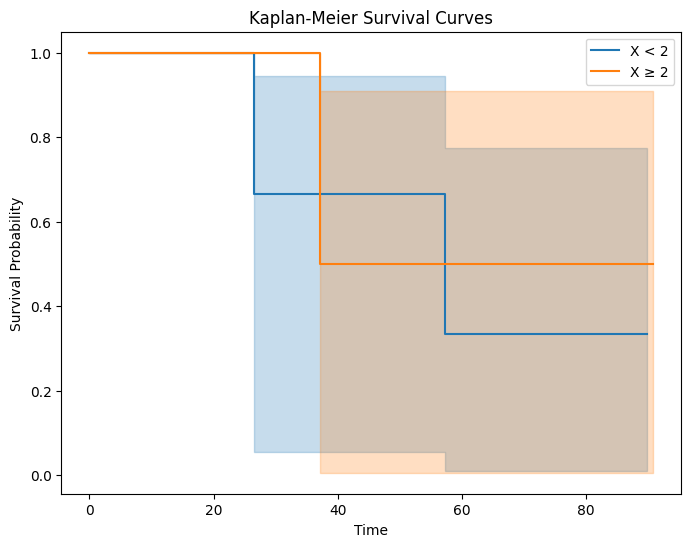

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Data
data = pd.DataFrame({
    'Y': [26.5, 37.2, 57.3, 90.8, 20.2, 89.8],
    'delta': [1, 1, 1, 0, 0, 0],
    'X': [0.1, 11, -0.3, 2.8, 1.8, 0.4]
})

# Split groups
group1 = data[data['X'] < 2]
group2 = data[data['X'] >= 2]

# Fit KM curves
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

plt.figure(figsize=(8,6))

kmf1.fit(durations=group1['Y'], event_observed=group1['delta'], label='X < 2')
kmf1.plot_survival_function()

kmf2.fit(durations=group2['Y'], event_observed=group2['delta'], label='X ≥ 2')
kmf2.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

By looking at the curves:

* **Group 1 (X < 2):** Has more censored observations and lower event times (20.2, 26.5, 57.3, 89.8).
* **Group 2 (X ≥ 2):** Only two observations, with one censored at 90.8.

**Observation:** There may be some difference, with Group 1 declining earlier because it has events at smaller times, while Group 2’s survival curve drops more slowly (though data is limited).

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data, duration_col='Y', event_col='delta')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 6 total observations, 3 right-censored observations>
             duration col = 'Y'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 6
number of events observed = 3
   partial log-likelihood = -3.95
         time fit was run = 2025-09-13 11:14:19 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
X          0.08      1.08      0.14           -0.20            0.35                0.82                1.42

           cmp to    z    p  -log2(p)
covariate                            
X            0.00 0.55 0.58      0.78
---
Concordance = 0.44
Partial AIC = 9.90
log-likelihood ratio test = 0.29 on 1 df
-log2(p) of ll-ratio test = 0.75

A Cox proportional hazards model was fit to the data using **Y** as the duration variable and **delta** as the event indicator, with the covariate being the group indicator **X** (where X = 1 for group with $X \ge 2$ and X = 0 for group with $X < 2$). The baseline hazard was estimated using the Breslow method. The dataset contained 6 observations, of which 3 events were observed.

The estimated coefficient for the group indicator is **0.08**, corresponding to a hazard ratio of **1.08**. This indicates that the hazard for the higher X group (X ≥ 2) is estimated to be slightly higher than that for the lower X group (X < 2), though the effect is very small. The 95% confidence interval for the coefficient ranges from -0.20 to 0.35, and the 95% confidence interval for the hazard ratio ranges from 0.82 to 1.42, indicating substantial uncertainty in the estimate.

The p-value for the coefficient is 0.58, suggesting that there is **no statistically significant evidence** that the true coefficient differs from zero. Similarly, the log-likelihood ratio test yields a very low test statistic (0.29 on 1 df) and p-value 0.59, consistent with the conclusion that the covariate does not significantly affect survival in this small dataset. The concordance index is 0.44, which is below 0.5, suggesting that the model does not have predictive discrimination better than chance.

There is no strong evidence that the survival experience differs between the two groups. The estimated hazard ratio of 1.08 suggests a slight increase in the instantaneous probability of the event for the higher X group, but this is not statistically meaningful given the data.